## Notebook to calculate the spectrum of $\Phi$ values for Hoel et al. 2016 (AND+AND+AND+AND)

In [1]:
import pyphi
import itertools
import numpy as np
import pandas as pd
from pyphi import phi_spectrum
import caffeine

caffeine.on(display=True)

n_nodes = 4
n_states = 2**n_nodes

## Create TPM
reverse_states = itertools.product([0,1],repeat=n_nodes)

## Reverse the order so that the states are ordered in little-endian
all_states = []
for state in reverse_states:
    all_states.append(state[::-1])
    
## Create a map between indices and states
state_index_map = {}
index = 0
for state in all_states:
    state_index_map[index]=state
    index = index+1
    

## For each state, get the probability of transitioning
TPM = np.zeros((n_states,n_states))
for i in range(n_states):
    current_state = state_index_map[i]
    print("Analyzing State = ",current_state)
    
    # Get probality of each node transitioning
    node_probs = []
    for j in range(n_nodes):
        if j == 0 or j == 1:
            input_to_node = current_state[2:4]
        else:
            input_to_node = current_state[0:2]
        if input_to_node == (1,1):
            p_on = 1.0
            p_off = 0.0
        else:
            p_off = 0.7
            p_on = 0.3
        node_probs.append([p_off,p_on])        
        
    # Get probability of global state transitions using node transitions
    for n in range(n_states):
        next_state = state_index_map[n]
#         print("\t Next State = ",next_state)
        transition_prob = 1.0
        for m in range(n_nodes):
            ## get node_probs at the value of that state
            index = next_state[m]
            transition_prob = transition_prob*node_probs[m][index]
            
#         print("\t Transition Prob = ",transition_prob)
        TPM[i][n] = transition_prob
        
        
## Make sure transitions sum to unity
for k in range(n_states):
    if not np.isclose(np.sum(TPM[k][:]),1.0):
        print("ERROR TPM NOT SUMMING TO UNITY")
        
# Set up network object
network = pyphi.Network(TPM, node_labels=['A','B','C','D'])
print("Network = ",network.node_labels)

# Put the system into a given state
state = (0,0,0,0)
nodes = ['A','B','C','D']

## Get the requisite Subsystem
subsystem = pyphi.Subsystem(network, state, nodes)

## What does PyPhi Give? Should be 0.09
pyphi_val = pyphi.compute.phi(subsystem)
print("PyPhi Value = ",pyphi_val)
        
## Calculate all Phi values
display_CES= False  # if True, output will display constellations
Phi_Spectrum = phi_spectrum.get_phi_spectrum(subsystem,display_CES)

print("\nCuts = ",Phi_Spectrum[0])
print("\nPhi Spectrum = ",Phi_Spectrum[1])

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Analyzing State =  (0, 0, 0, 0)
Analyzing State =  (1, 0, 0, 0)
Analyzing State =  (0, 1, 0, 0)
Analyzing State =  (1, 1, 0, 0)
Analyzing State =  (0, 0, 1, 0)
Analyzing State =  (1, 0, 1, 0)
Analyzing State =  (0, 1, 1, 0)
Analyzing State =  (1, 1, 1, 0)
Analyzing State =  (0, 0, 0, 1)
Analyzing State =  (1, 0, 0, 1)
Analyzing State =  (0, 1, 0, 1)
Analyzing State =  (1, 1, 0, 1)
Analyzing State =  (0, 0, 1, 1)
Analyzing State =  (1, 0, 1, 1)
Analyzing State =  (0, 1, 1, 1)
Analyzing State =  (1, 1, 1, 1)
Network =  NodeLabels(('A', 'B', 'C', 'D'))


PyPhi Value =  0.11389
	Number of Non-unique Constellations = 6561

Evaluating Cut  Cut [A] ━━/ /━━➤ [B, C, D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [B] ━━/ /━━➤ [A, C, D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [A, B] ━━/ /━━➤ [C, D]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [C] ━━/ /━━➤ [A, B, D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [A, C] ━━/ /━━➤ [B, D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [B, C] ━━/ /━━➤ [A, D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [A, B, C] ━━/ /━━➤ [D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [D] ━━/ /━━➤ [A, B, C]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [A, D] ━━/ /━━➤ [B, C]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [B, D] ━━/ /━━➤ [A, C]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [A, B, D] ━━/ /━━➤ [C]
	Number of Non-unique Constell

In [16]:
Phi_MIP = phi_spectrum.get_Phi_MIP(Phi_Spectrum)
print("Phi MIP = ",Phi_MIP)
print(len(Phi_MIP))
np.savetxt("results/phi_spectrum_hoel_2016.csv", Phi_MIP, delimiter=",")
print("Results Saved")

Phi MIP =  [0.       0.027778 0.029167 0.055555 0.055556 0.056944 0.056945 0.058333
 0.058334 0.083333 0.083334 0.084722 0.084723 0.086111 0.086112 0.0875
 0.087501 0.111111 0.111112 0.1125   0.112501 0.113889 0.11389  0.115278
 0.115279 0.116666 0.116667 0.116668 0.138889 0.13889  0.140277 0.140278
 0.140279 0.141666 0.141667 0.141668 0.143055 0.143056 0.143057 0.144444
 0.144445 0.145833 0.145834 0.166667 0.166668 0.168055 0.168056 0.168057
 0.169444 0.169445 0.169446 0.170833 0.170834 0.172222 0.172223 0.173611
 0.173612 0.175    0.175001 0.194445 0.194446 0.195833 0.195834 0.195835
 0.197222 0.197223 0.197224 0.198611 0.198612 0.2      0.200001 0.201389
 0.20139  0.202778 0.202779 0.204167 0.222223 0.223612 0.225    0.225001
 0.226389 0.22639  0.227777 0.227778 0.227779 0.229166 0.229167 0.229168
 0.230555 0.230556 0.230557 0.231945 0.233333 0.233334 0.251389 0.25139
 0.252778 0.252779 0.254166 0.254167 0.254168 0.255555 0.255556 0.255557
 0.256944 0.256945 0.256946 0.258333 0.2583

In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

## Choose a font that renders the cut symbol properly
def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "\u27A4"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]
for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])

/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/Library/Fonts/AppleGothic.ttf AppleGothic
/System/Library/Fonts/LastResort.ttf .LastResort
/System/Library/Fonts/ZapfDingbats.ttf Zapf Dingbats
/Library/Fonts/AppleMyungjo.ttf AppleMyungjo
/Library/Fonts/Arial Unicode.ttf Arial Unicode MS


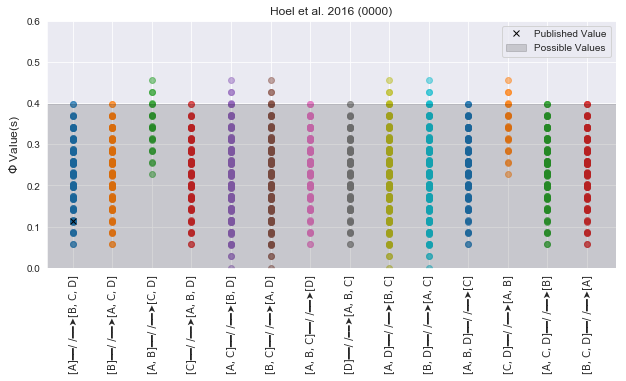

In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
# font_path = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Plot published value and possible values
plt.plot([0],pyphi_val,'kx',label=r'Published Value')
ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible Values')
# ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible $\Phi^{Max}$ Values')

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    ## Plot
    plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)
    x_labels.append(cut_label)
    
## Clean Up
plt.title('Hoel et al. 2016 (0000)')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xticks(range(len(Phi_Spectrum[0])),x_labels,rotation=90,fontproperties=font)
plt.ylim((-0.0,0.6))
plt.legend()
# plt.legend(ncol=1,bbox_to_anchor = [1.25,1.0],prop=font,fontsize=12)
plt.tight_layout()
# plt.savefig("Hoel_2016_OFF.pdf")
plt.show()